## 参考  
Getting started with PyMC3  
https://docs.pymc.io/notebooks/getting_started.html  

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%config InlineBackend.figure_format = 'retina'

# Initialize random number 
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

Text(0.5, 0, 'X2')

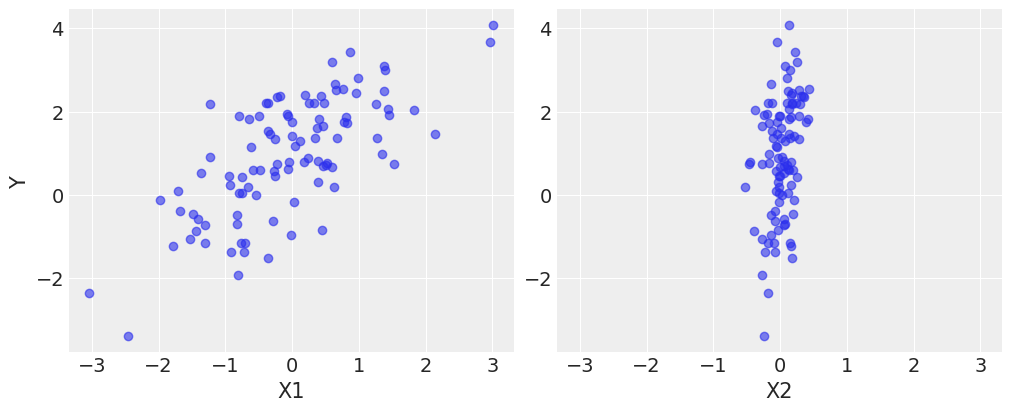

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

In [7]:
import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")
pm.__version__

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.11.2


'3.11.2'

In [8]:
%%time
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0,sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

Wall time: 2.33 s


## maximum a posteriori (MAP)  
例として記載してあるが、これはmodeの点推定であり、あまり使われない。
いかのMCMCなどによるsampling methodを使う！

In [9]:
%%time
map_estimate = pm.find_MAP(model=basic_model)
map_estimate


Wall time: 3.05 s


{'alpha': array(0.9235218),
 'beta': array([0.93756468, 2.50005318]),
 'sigma_log__': array(-0.14818009),
 'sigma': array(0.86227581)}

## Sampling method

In [11]:
%%time
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 19 seconds.


Wall time: 29.9 s


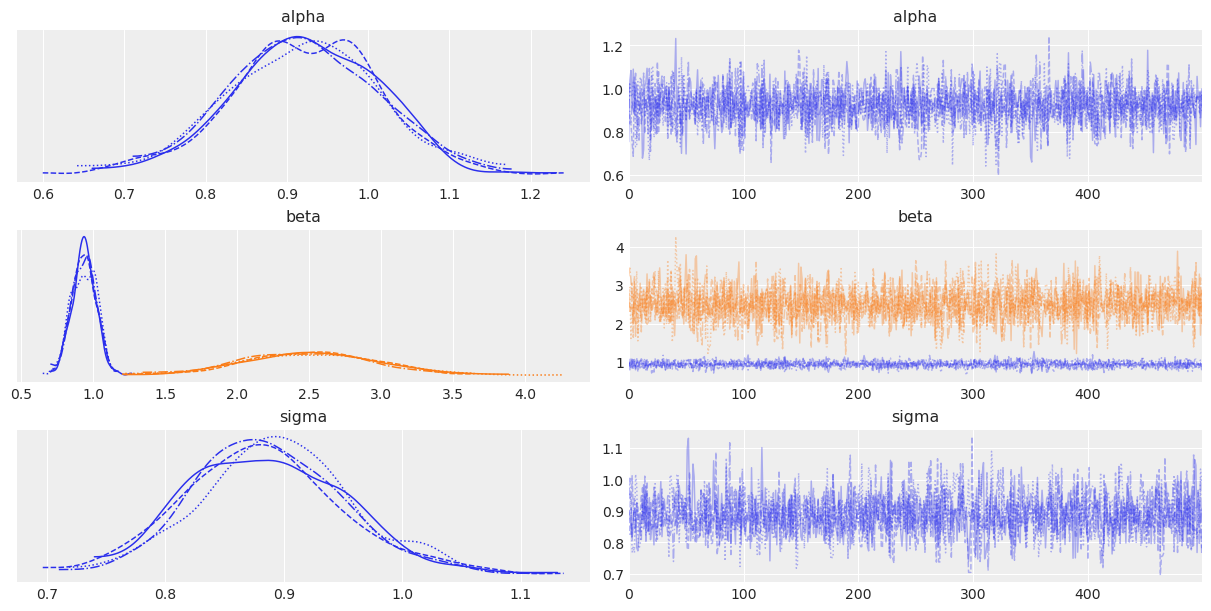

In [12]:
with basic_model:
    az.plot_trace(trace);

In [14]:
with basic_model:
    display(az.summary(trace, round_to=3))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.922,0.091,0.745,1.088,0.002,0.001,3100.725,1472.414,1.000
beta[0],0.937,0.083,0.787,1.083,0.001,0.001,3171.304,1658.502,1.002
beta[1],2.508,0.449,1.652,3.328,0.009,0.007,2448.050,1397.841,1.002
sigma,0.888,0.066,0.767,1.019,0.001,0.001,2440.544,1218.776,1.003


In [18]:
trace.get_values('alpha', chains=3)

array([1.02612581, 0.88633056, 0.84295493, 0.94259143, 0.89914607,
       0.87907277, 1.0715479 , 0.76917944, 0.86030279, 0.76148406,
       1.04826036, 1.0407907 , 0.96923291, 0.99388012, 0.9219117 ,
       0.95077555, 0.89371954, 0.79130956, 1.09341245, 0.7097009 ,
       1.06055577, 0.93653871, 0.8580115 , 0.88607133, 0.94926842,
       0.79345152, 1.0787019 , 0.84033494, 1.00517976, 1.06514417,
       0.88397971, 1.05555345, 0.8489078 , 1.02775517, 0.76991133,
       1.02350665, 0.90551809, 1.05579101, 0.79947862, 0.86004105,
       0.94449103, 0.9124931 , 0.74592445, 0.82432846, 0.8269115 ,
       0.88969566, 0.79022564, 0.79633596, 1.00533019, 0.95025864,
       0.88779004, 0.99350907, 1.12760971, 0.86081381, 0.92610976,
       0.92610976, 0.90923742, 0.89687859, 0.88469264, 0.98066109,
       0.90034561, 0.8619873 , 0.95939108, 1.04969162, 1.04926021,
       0.74208703, 0.91335906, 0.81908958, 0.79205251, 0.97034844,
       0.77422938, 0.85273404, 0.85273404, 0.99878968, 0.83271